<a href="https://colab.research.google.com/github/Nikhil-Rao-789/Ai-for-heath/blob/main/Scripts/vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

PROJECT_ROOT = "/content/drive/MyDrive/AI for Health"
DATA_DIR = f"{PROJECT_ROOT}/Data"
VIS_DIR = f"{PROJECT_ROOT}/Visualizations"


Mounted at /content/drive


In [3]:
participant = input("Enter Participant name for Visualizations: ")
dfSP02 = pd.read_csv(f'{DATA_DIR}/{participant}/SPO2.txt', sep=';',skiprows=7,names=["Time","Value"])
dfFlow = pd.read_csv(f'{DATA_DIR}/{participant}/Flow.txt', sep=';',skiprows=7,names=["Time","Value"])
dfThorac = pd.read_csv(f'{DATA_DIR}/{participant}/Thorac.txt', sep=';',skiprows=7,names=["Time","Value"])

Enter Participant name for Visualizations: AP01


In [4]:
dfSP02["Time"] = pd.to_datetime(dfSP02["Time"],format="%d.%m.%Y %H:%M:%S,%f")
dfFlow["Time"] = pd.to_datetime(dfFlow["Time"],format="%d.%m.%Y %H:%M:%S,%f")
dfThorac["Time"] = pd.to_datetime(dfThorac["Time"],format="%d.%m.%Y %H:%M:%S,%f")

In [5]:
dfSP02.set_index("Time",inplace = True)
dfFlow.set_index("Time",inplace = True)
dfThorac.set_index("Time",inplace = True)

In [6]:
minSPO2 = 80
maxSPO2 = 100
minFlow = 70
maxFlow = 130
minThorac = 5
maxThorac = 25
dfSP02["Value"] = dfSP02["Value"].where((dfSP02["Value"] >= minSPO2) & (dfSP02["Value"] <= maxSPO2), np.nan).interpolate(method="linear")
dfFlow["Value"] = dfFlow["Value"].where((dfFlow["Value"] >= minFlow) & (dfFlow["Value"] <= maxFlow), np.nan).interpolate(method="linear")
dfThorac["Value"] = dfThorac["Value"].where((dfThorac["Value"] >= minThorac) & (dfThorac["Value"] <= maxThorac), np.nan).interpolate(method="linear")

In [26]:
start_time1 = dfSP02.index[0]
start_time2 = dfFlow.index[0]
start_time3 = dfThorac.index[0]
end_time1 = start_time1 + pd.Timedelta(seconds=300)
end_time2 = start_time2 + pd.Timedelta(seconds=300)
end_time3 = start_time3 + pd.Timedelta(seconds=300)

dfSP02_5min = dfSP02.loc[start_time1:end_time1]
dfFlow_5min = dfFlow.loc[start_time2:end_time2]
dfThorac_5min = dfThorac.loc[start_time3:end_time3]

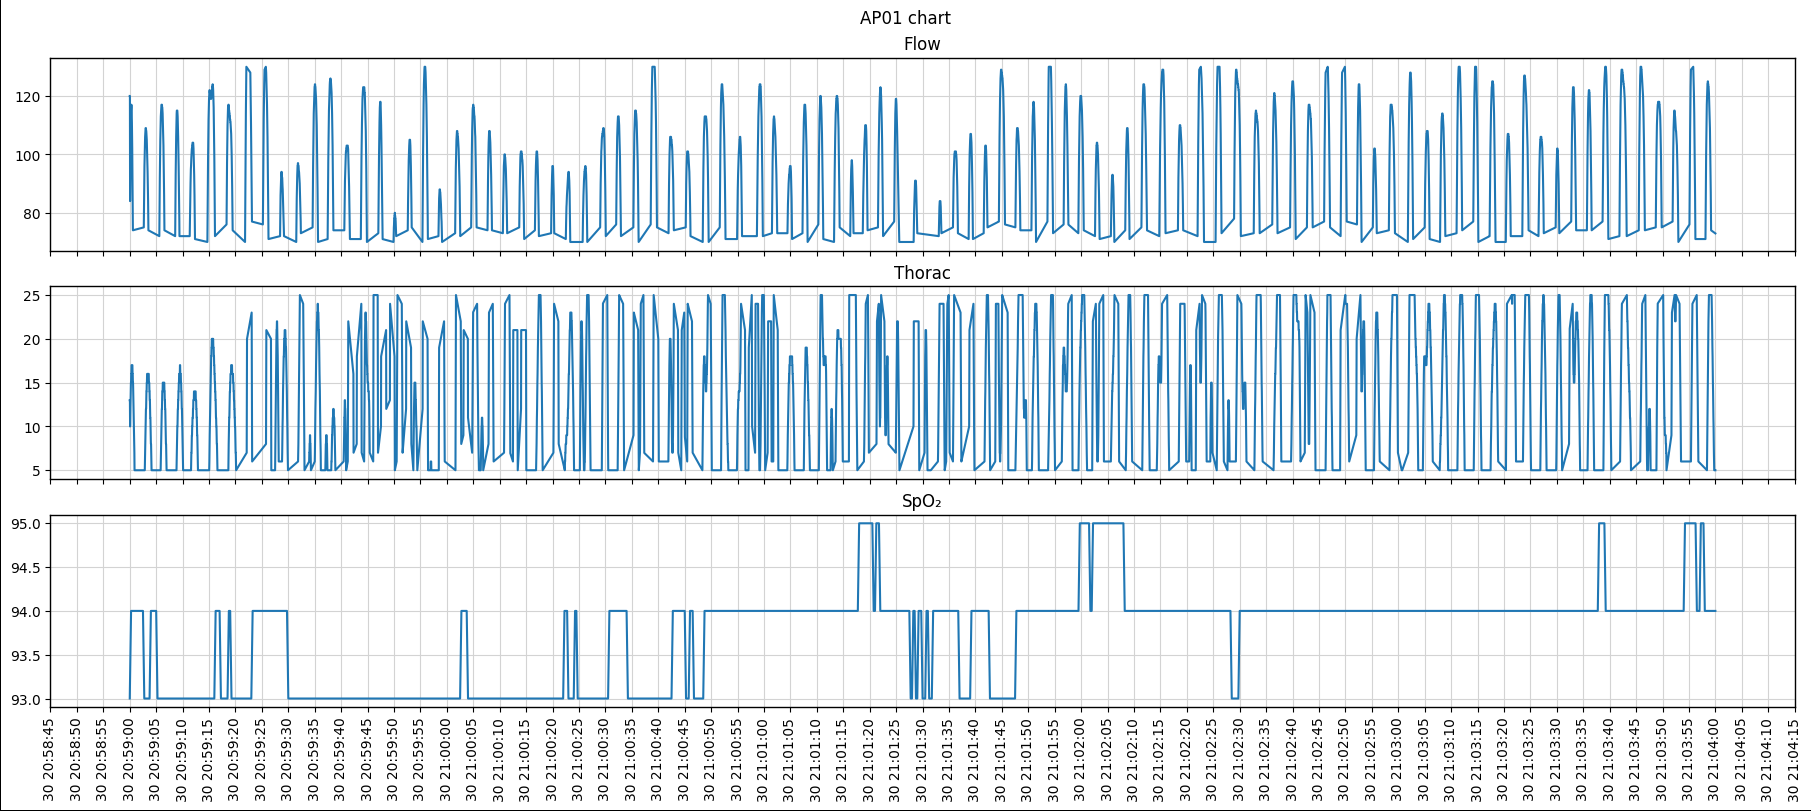

In [28]:
fig, ax = plt.subplots(3, 1,figsize=(18, 8),sharex=True,constrained_layout=True)
fig.patch.set_facecolor("white")
fig.patch.set_edgecolor("black")
fig.patch.set_linewidth(1.2)

ax[0].plot(dfFlow_5min.index, dfFlow_5min["Value"])
ax[0].set_title("Flow")

ax[1].plot(dfThorac_5min.index, dfThorac_5min["Value"])
ax[1].set_title("Thorac")

ax[2].plot(dfSP02_5min.index, dfSP02_5min["Value"])
ax[2].set_title("SpO₂")

ax[2].xaxis.set_major_formatter(mdates.DateFormatter("%d %H:%M:%S"))
ax[2].xaxis.set_major_locator(mdates.SecondLocator(interval=5))

plt.setp(ax[2].get_xticklabels(), rotation=90)
plt.setp(ax[2].get_xticklabels(), rotation=90)
for a in ax:
    a.grid(True, which="major", color="lightgray", linewidth=0.8)
    for spine in a.spines.values():
        spine.set_color("black")
        spine.set_linewidth(1)

plt.suptitle("AP01 chart")
plt.show()

In [11]:
dfSP02.head(5)

,Value
Time,
2024-05-30 20:59:00.000,93.0
2024-05-30 20:59:00.250,94.0
2024-05-30 20:59:00.500,94.0
2024-05-30 20:59:00.750,94.0
2024-05-30 20:59:01.000,94.0


In [12]:
dfFlow.head(5)

,Value
Time,
2024-05-30 20:59:00.000,120.0
2024-05-30 20:59:00.031,120.0
2024-05-30 20:59:00.062,84.0
2024-05-30 20:59:00.094,91.0
2024-05-30 20:59:00.125,97.0


In [13]:
dfThorac.head(5)

,Value
Time,
2024-05-30 20:59:00.000,13.0
2024-05-30 20:59:00.031,13.0
2024-05-30 20:59:00.062,10.0
2024-05-30 20:59:00.094,11.0
2024-05-30 20:59:00.125,12.0
